In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

data = pd.read_csv('bus_data.csv')
data.head()

id  name         type  calculatedCourse routeName   created  longitude  \
0  4855  4131  Transit Bus        135.131827   A Route  04:32 PM -74.450146   
1  4856  4132  Transit Bus        332.053051  EE Route  04:32 PM -74.445469   
2  4859  4177  Transit Bus        112.470602  LX Route  04:32 PM -74.448120   
3  4873  4191  Transit Bus        194.693413   H Route  04:32 PM -74.466362   
4  4876  4194  Transit Bus         45.622735   F Route  04:32 PM -74.437797   

    latitude  speed  paxLoad  totalCap  outOfService  more  tripId  deviceId  \
0  40.501523    NaN        0        67             0   102     NaN    402213   
1  40.500126    NaN        3        67             0   102     NaN    402215   
2  40.499571    NaN        7        67             0   101     NaN    402325   
3  40.514399    NaN        5        67             0   101     NaN    402329   
4  40.484496    NaN        5        67             0   102     NaN    402330   

   outdated  routeBlockId            timestamp  
0         0        111533  2024-10-24 16:32:24  
1         0        111579  2024-10-24 16:32:24  
2         0        111425  2024-10-24 16:32:24  
3         0        111644  2024-10-24 16:32:24  
4         0        117895  2024-10-24 16:32:24

In [2]:
# convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.drop(['speed', 'outOfService', 'tripId', 'outdated'], axis=1, inplace=True)
data['load'] = data['paxLoad'] / data['totalCap']
# only use the latitude and longitude columns between certain values
data = data[(data['latitude'] > 40.4) & (data['latitude'] < 40.53)]
data = data[(data['longitude'] > -74.5) & (data['longitude'] < -74.3)]
data.head()

id  name         type  calculatedCourse routeName   created  longitude  \
0  4855  4131  Transit Bus        135.131827   A Route  04:32 PM -74.450146   
1  4856  4132  Transit Bus        332.053051  EE Route  04:32 PM -74.445469   
2  4859  4177  Transit Bus        112.470602  LX Route  04:32 PM -74.448120   
3  4873  4191  Transit Bus        194.693413   H Route  04:32 PM -74.466362   
4  4876  4194  Transit Bus         45.622735   F Route  04:32 PM -74.437797   

    latitude  paxLoad  totalCap  more  deviceId  routeBlockId  \
0  40.501523        0        67   102    402213        111533   
1  40.500126        3        67   102    402215        111579   
2  40.499571        7        67   101    402325        111425   
3  40.514399        5        67   101    402329        111644   
4  40.484496        5        67   102    402330        117895   

            timestamp      load  
0 2024-10-24 16:32:24  0.000000  
1 2024-10-24 16:32:24  0.044776  
2 2024-10-24 16:32:24  0.104478  
3 2024-10-24 16:32:24  0.074627  
4 2024-10-24 16:32:24  0.074627

C:\Users\akash\AppData\Local\Temp\ipykernel_22952\3465549065.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['load'])


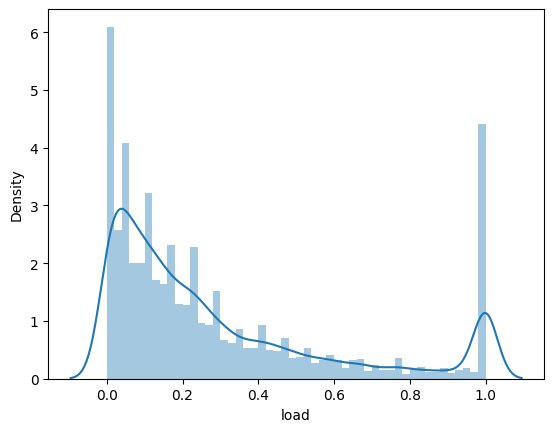

In [3]:
# plot the distribution of the load
sns.distplot(data['load'])
plt.show()

In [4]:
data.describe()

id          name  calculatedCourse     longitude  \
count  79712.000000  79712.000000      79712.000000  79712.000000   
mean    9417.224809   3211.250640        179.198192    -74.447872   
std     4621.225395   1606.324416         97.338536      0.010100   
min     4839.000000    127.000000          0.018745    -74.518140   
25%     4877.000000   3260.000000        103.873008    -74.457162   
50%     7181.000000   4038.000000        163.303638    -74.448140   
75%    13214.000000   4190.000000        273.814075    -74.438483   
max    17626.000000   4910.000000        359.970812    -74.186618   

           latitude       paxLoad      totalCap          more       deviceId  \
count  79712.000000  79712.000000  79712.000000  79712.000000   79712.000000   
mean      40.507767     19.590890     66.961875    101.495559  412956.294184   
std        0.015318     21.328391      7.079388      3.564675    9943.352184   
min       40.412717      0.000000     30.000000     11.000000  402213.000000   
25%       40.497621      4.000000     67.000000    101.000000  402720.000000   
50%       40.506680     12.000000     67.000000    102.000000  411189.000000   
75%       40.523497     27.000000     67.000000    102.000000  422698.000000   
max       40.739773     80.000000     80.000000    105.000000  429484.000000   

        routeBlockId          load  
count   79712.000000  79712.000000  
mean   109477.977381      0.289753  
std     16420.335250      0.303032  
min      5451.000000      0.000000  
25%    111533.000000      0.059701  
50%    111644.000000      0.179104  
75%    112517.000000      0.402985  
max    117898.000000      1.000000

In [5]:
# print the unique values of deviceId
print(data['deviceId'].unique())

[402213 402215 402325 402329 402330 402643 402645 402646 402647 402694
 402696 402698 402699 402707 402708 402720 402723 402727 402729 402741
 402867 405378 405380 405382 405404 406275 411187 411189 415102 415104
 415105 417553 417554 417555 417557 417559 422692 422694 422698 422700
 422708 422712 422714 428735 429476 429478 429482 429484 402733 405192
 411194 417561 405190]


In [6]:
# print the unique values of routeBlockId
print(data['routeBlockId'].unique())

[111533 111579 111425 111644 117895 112515 111422 111416 111683 111423
 111420 111418 111535 111679 111643 111676 111534 113248 113251 113278
 112513 117897 117896 111602 111603 111531 111413 111421 111641 111680
 111582 111682 111424 112516 112747 111532 111426 111580 111642 112514
 111340 113246 113250 113249   5451 117898 111601 111581 111419 111604
 111646 111427 111645 113252 111605 111681 111606 111341 111607 111428
 111647 111648 111429 111538 112517 113253 111684 111685 111539 111430
 112518 111609 111608 117891 117892 117893 111610 111649 113255 113254
 111431 111540 111686 112519   5452 117894 111432 111433 111650 113256
 111687 111541 111542 111611 111435 111613 111688 111434 111612   5453
 111651 111614 111615 111652 111436 112725 111543 113257 113258 111545
 111544 111616 111653 113259 111536 111689 112520 112521 111342 112723
 111655 111654 111617 111618 112724  70470  70455  70471  70456  70457
  70472]


In [7]:
# for each unique routeBlockId, print the average value of latitude and longitude as well as load
for routeBlockId in data['routeBlockId'].unique():
    print(routeBlockId)
    print(data[data['routeBlockId'] == routeBlockId].mean())
    print()

111533
id                    5892.302483
name                  4118.957111
calculatedCourse       175.500550
longitude              -74.456567
latitude                40.512916
paxLoad                  6.857788
totalCap                67.000000
more                   101.591422
deviceId            404755.787810
routeBlockId        111533.000000
load                     0.102355
dtype: float64

111579
id                    4856.000000
name                  4132.000000
calculatedCourse       188.695475
longitude              -74.442291
latitude                40.493063
paxLoad                 17.041975
totalCap                67.000000
more                   101.516049
deviceId            402215.000000
routeBlockId        111579.000000
load                     0.254358
dtype: float64

111425
id                    4859.000000
name                  4177.000000
calculatedCourse       171.486341
longitude              -74.444912
latitude                40.515477
paxLoad                 27.48

C:\Users\akash\AppData\Local\Temp\ipykernel_8648\1007212681.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(data[data['routeBlockId'] == routeBlockId].mean())
C:\Users\akash\AppData\Local\Temp\ipykernel_8648\1007212681.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data[data['routeBlockId'] == routeBlockId].mean())


id                   17626.000000
name                  4004.000000
calculatedCourse       190.532482
longitude              -74.440617
latitude                40.490659
paxLoad                 33.870317
totalCap                68.000000
more                   101.636888
deviceId            417555.000000
routeBlockId        111608.000000
load                     0.498093
dtype: float64

117891
id                    4895.000000
name                  4212.000000
calculatedCourse       186.026453
longitude              -74.442016
latitude                40.491992
paxLoad                 13.507227
totalCap                67.000000
more                   101.612352
deviceId            402708.000000
routeBlockId        117891.000000
load                     0.201600
dtype: float64

117892
id                    6730.525424
name                   354.516297
calculatedCourse       182.657038
longitude              -74.441810
latitude                40.491699
paxLoad                 10.220339
to

In [10]:
# get the average latitude and longitude for each routeBlockId
# plot the location of each routeBlockId
locations = data.groupby('routeBlockId').mean()
locations = locations[['latitude', 'longitude']]
locations.reset_index(inplace=True)

m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=15)
mc = MarkerCluster()
for idx, row in locations.iterrows():
    mc.add_child(folium.Marker(location=[row['latitude'], row['longitude']], tooltip=row['routeBlockId']))
m.add_child(mc)
m.save('maps/map.html')

C:\Users\akash\AppData\Local\Temp\ipykernel_10192\1010738749.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  locations = data.groupby('routeBlockId').mean()


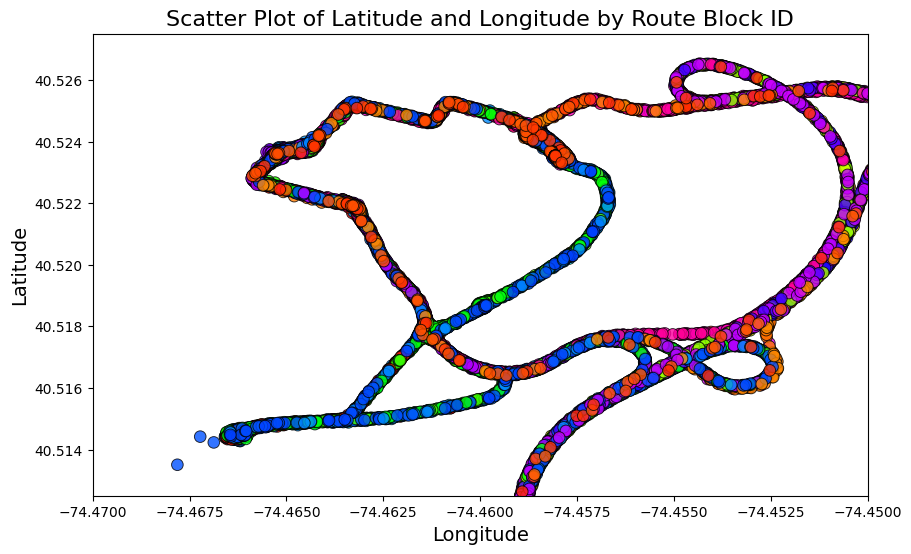

In [5]:
# Determine a color palette that adapts to the unique number of routeBlockId values
unique_route_blocks = data['routeBlockId'].nunique()
palette = sns.color_palette("hsv", unique_route_blocks)

# Create scatter plot with routeBlockId as hue and customized color palette
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=data, 
    x='longitude', 
    y='latitude', 
    hue='routeBlockId', 
    palette=palette, 
    s=70, 
    edgecolor='k', 
    alpha=0.8,
    legend=False
)

# Add titles and labels for better readability
plt.title("Scatter Plot of Latitude and Longitude by Route Block ID", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

# Set plot limits
plt.ylim(40.5125, 40.5275)
plt.xlim(-74.47, -74.45)

# Display legend outside the plot
# plt.legend(title="Route Block ID", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx

# Determine a color palette that adapts to the unique number of routeBlockId values
unique_route_blocks = data['routeBlockId'].nunique()
palette = sns.color_palette("hsv", unique_route_blocks)

# Create scatter plot with routeBlockId as hue and customized color palette
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=data, 
    x='longitude', 
    y='latitude', 
    hue='routeBlockId', 
    palette=palette, 
    s=70, 
    edgecolor='k', 
    alpha=0.8,
    legend=False
)

# Add titles and labels for better readability
plt.title("Scatter Plot of Latitude and Longitude by Route Block ID", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

# Set plot limits
plt.ylim(40.5125, 40.5275)
plt.xlim(-74.47, -74.45)

# Add the map background with contextily
# Note: contextily expects coordinates in Web Mercator format
scatter_plot = scatter.get_figure()
scatter_plot.axes[0].set_xlim(-8282490, -8279740)
scatter_plot.axes[0].set_ylim(4964920, 4966700)

# Add a basemap; use crs="EPSG:3857" for Web Mercator
ctx.add_basemap(scatter_plot.axes[0], crs="EPSG:3857", source=ctx.providers.Stamen.TonerLite)

# Show the plot
plt.show()


ImportError: numpy._core.multiarray failed to import

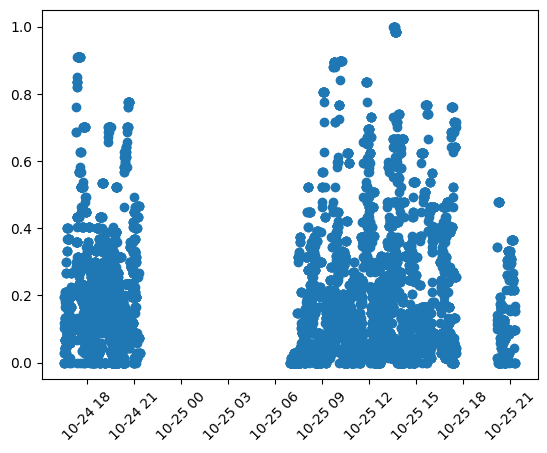

In [8]:
# get a specific route and plot the scatter plot of load over time
route = 'A Route'
data_route = data[data['routeName'] == route]
plt.scatter(data_route['timestamp'], data_route['load'])
# make the x axis more readable
plt.xticks(rotation=45)
plt.show()

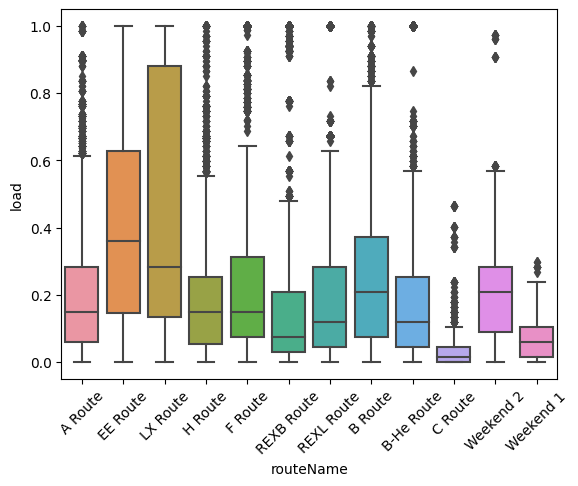

In [9]:
# plot the distribution of load for each route
sns.boxplot(x='routeName', y='load', data=data)
plt.xticks(rotation=45)
plt.show()

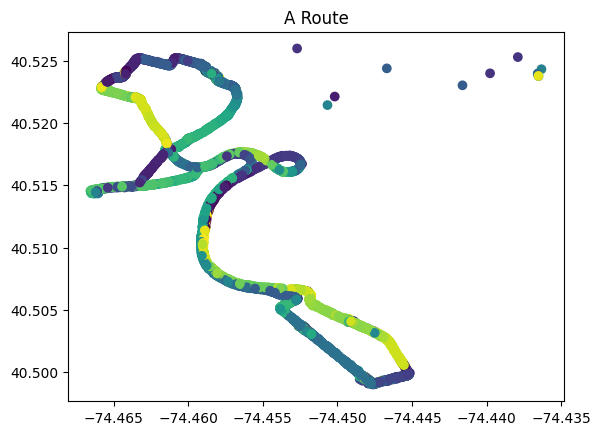

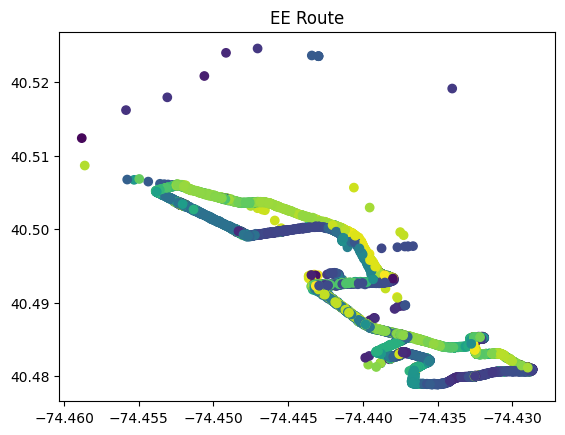

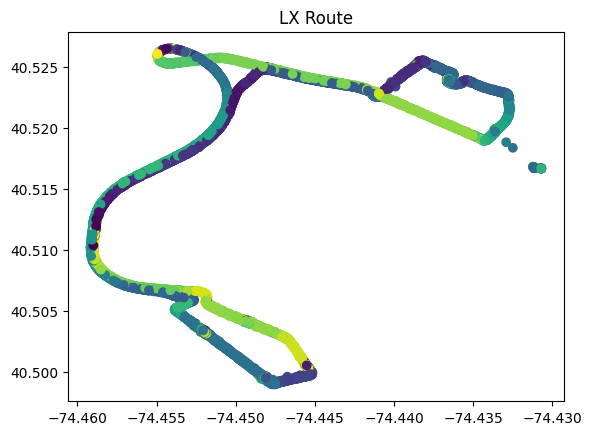

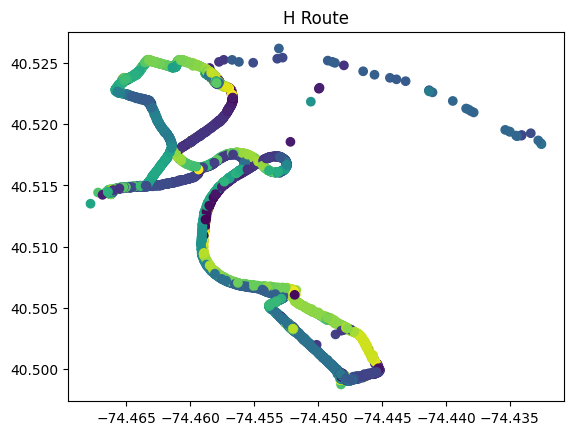

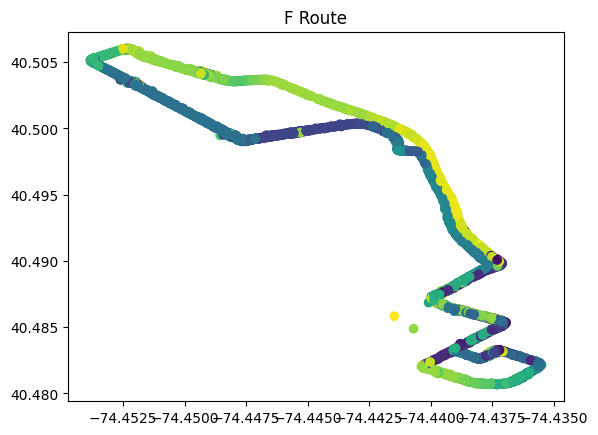

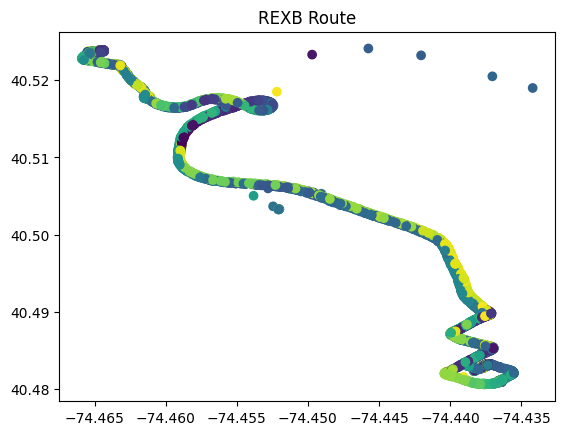

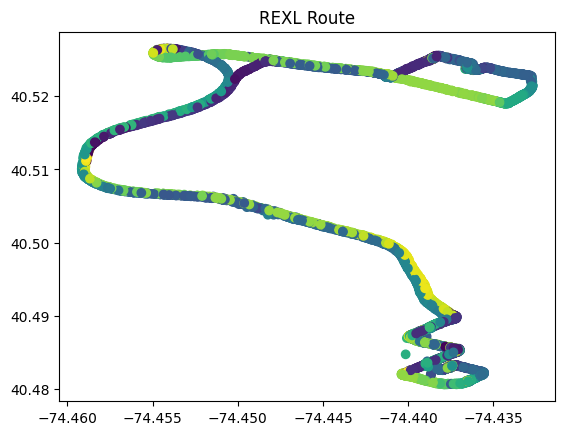

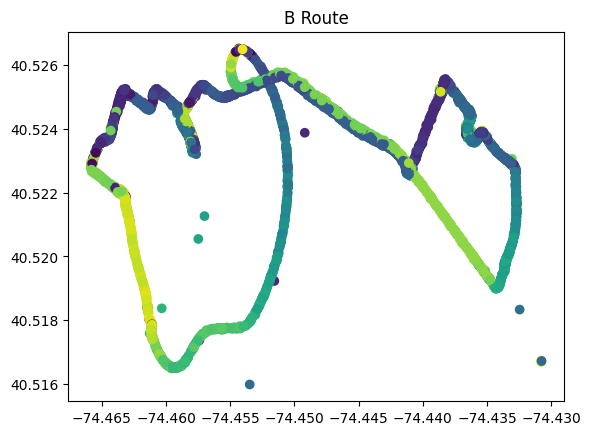

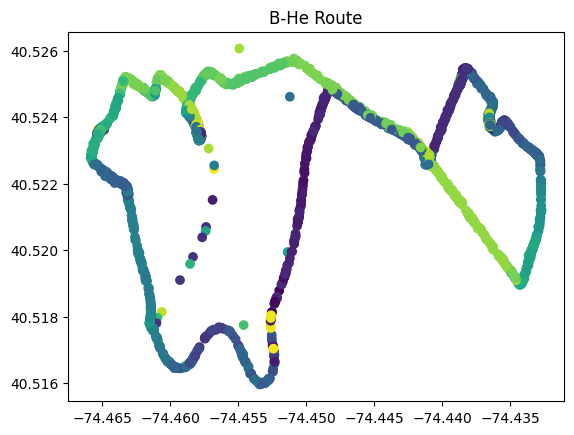

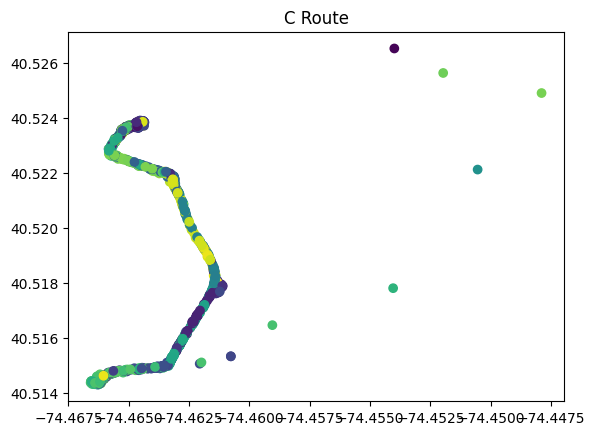

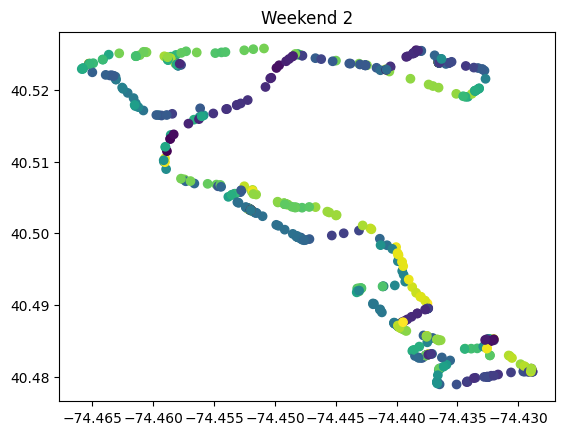

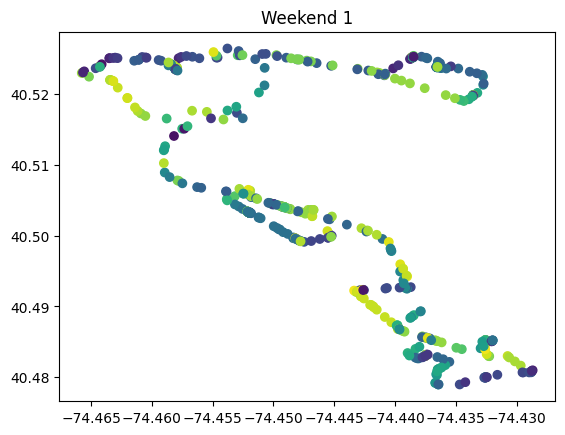

In [6]:
# make a heat map with the longitude and latitude data for each route
for route in data['routeName'].unique():
    data_route = data[data['routeName'] == route]
    plt.scatter(data_route['longitude'], data_route['latitude'], c=data_route['calculatedCourse'])
    plt.title(route)
    plt.show()

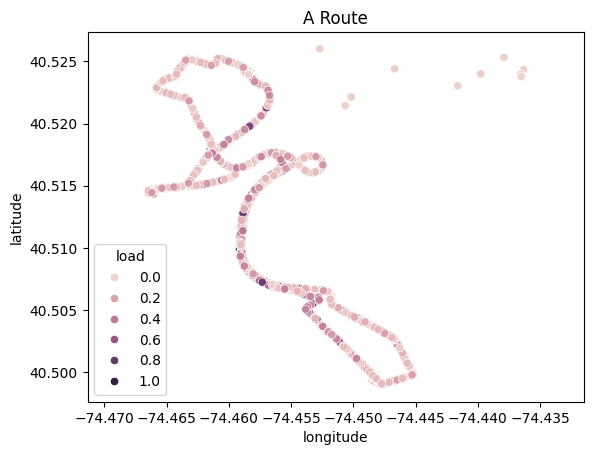

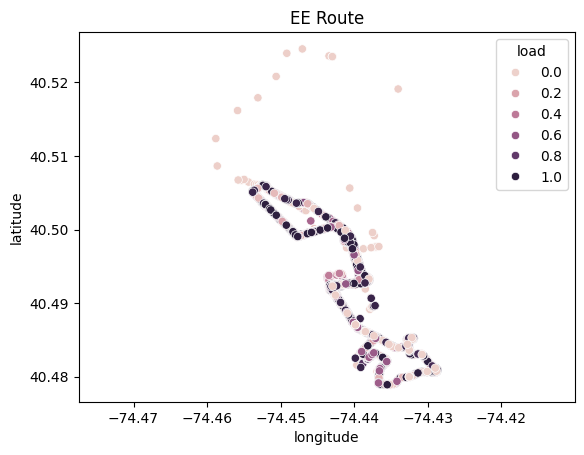

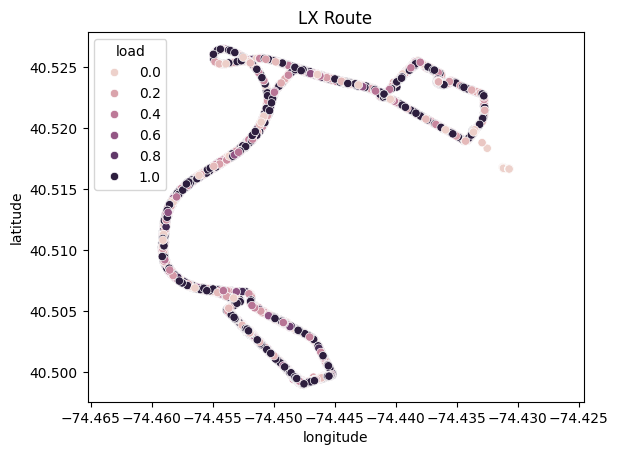

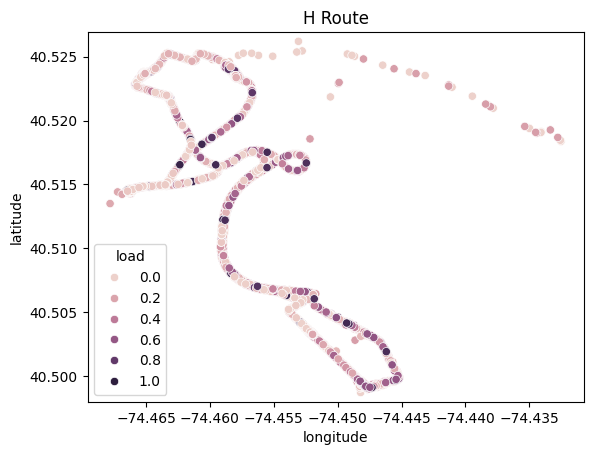

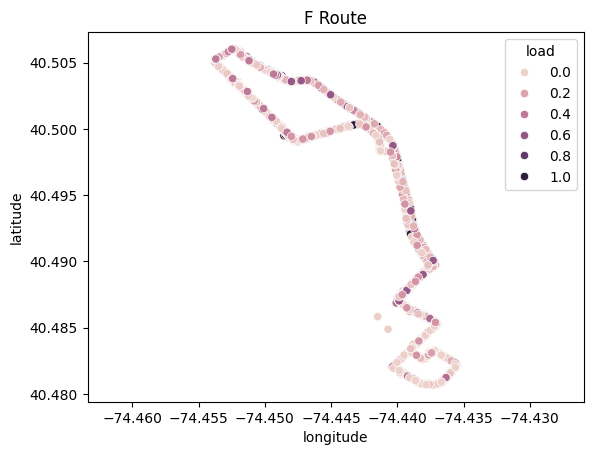

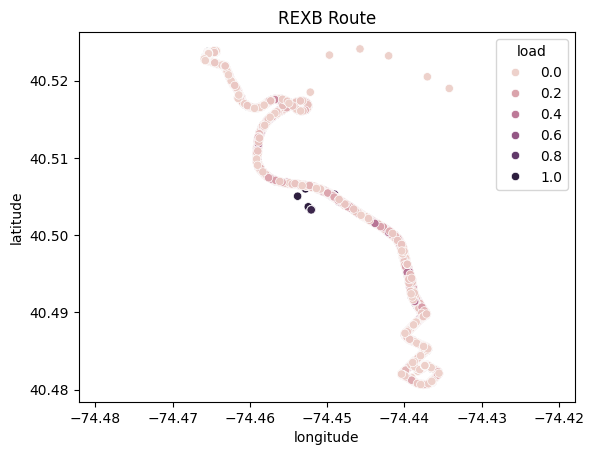

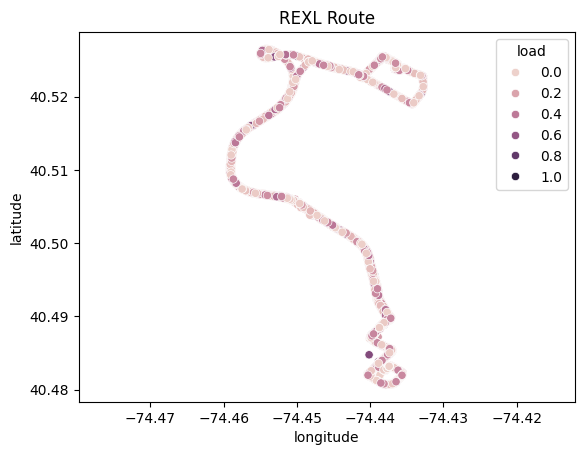

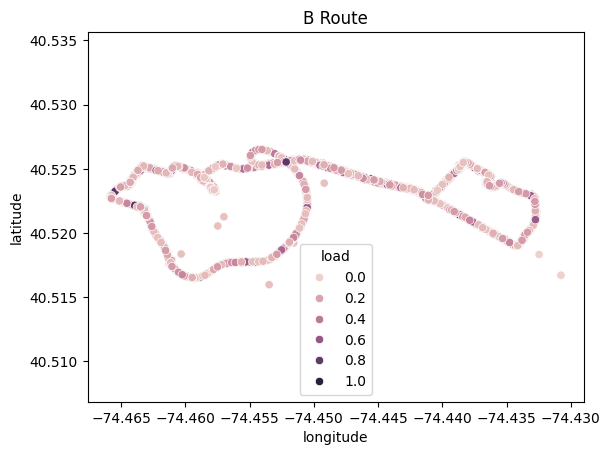

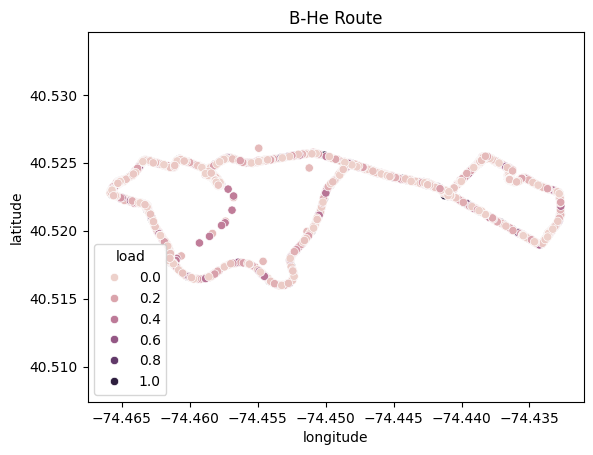

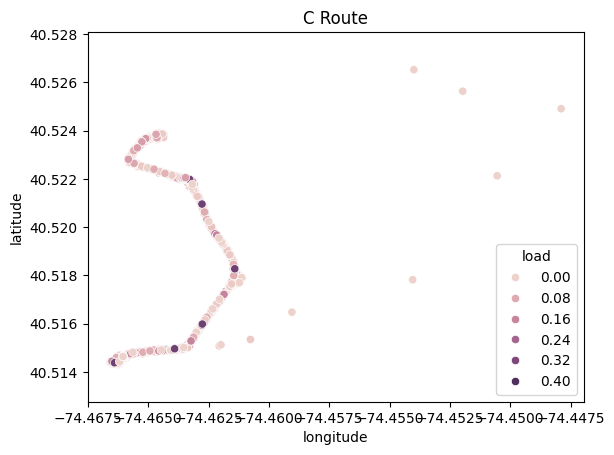

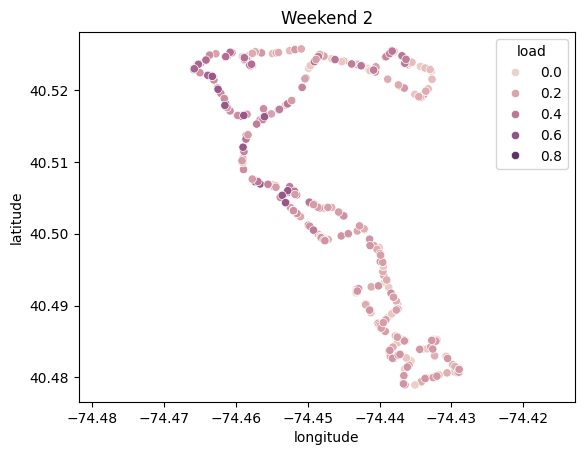

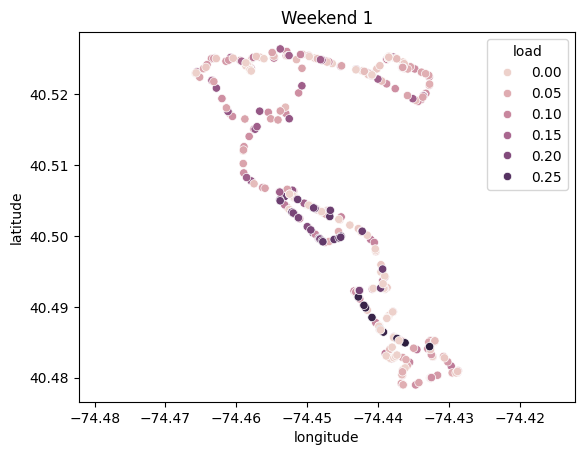

In [7]:
# plot the scatter plot of longitude and latitude for each route as well as hue for the load
for route in data['routeName'].unique():
    data_route = data[data['routeName'] == route]
    sns.scatterplot(x='longitude', y='latitude', hue='load', data=data_route)
    plt.title(route)

    # make it so that the x and y scale is the same
    plt.axis('equal')
    plt.show()

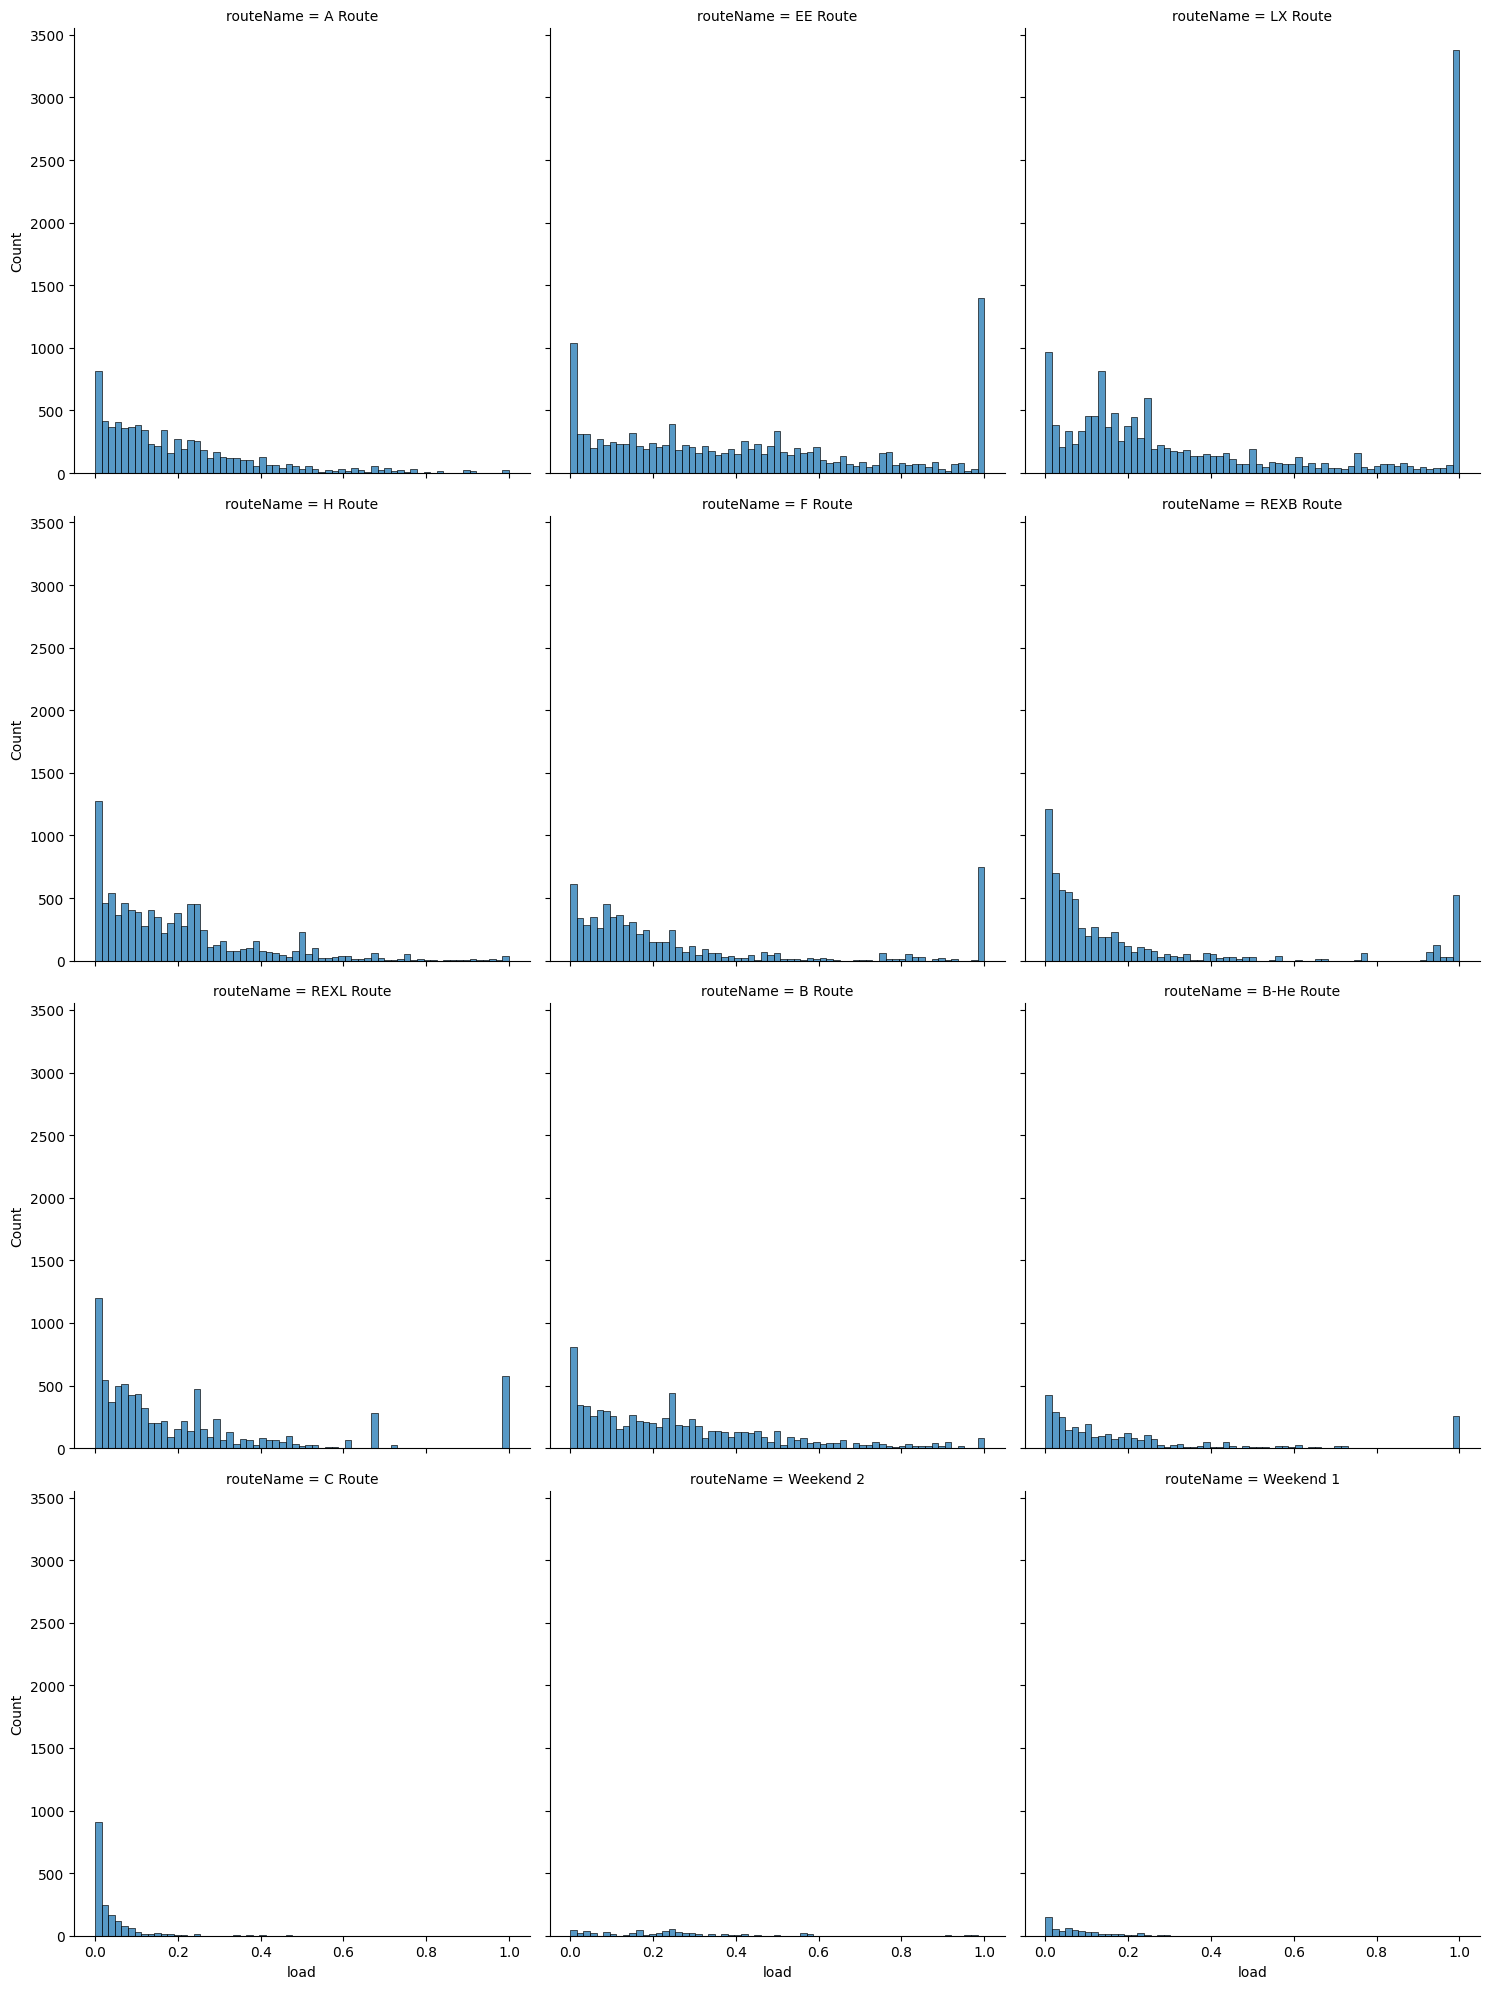

In [8]:
# graph the distribution of more
sns.displot(data, x='load', col='routeName', col_wrap=3)
plt.show()

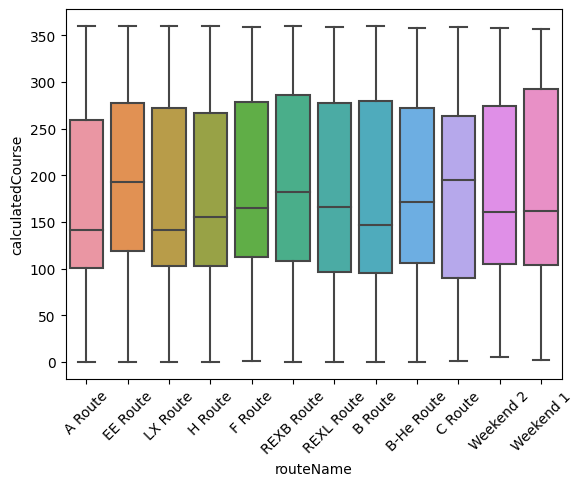

In [13]:
# plot the distribution of calc course for each route
sns.boxplot(x='routeName', y='calculatedCourse', data=data)
plt.xticks(rotation=45)
plt.show()

In [9]:
for route in data['routeName'].unique():
    data_route = data[data['routeName'] == route]

    # Initialize map at an approximate central location of your data
    map_route = folium.Map(
        location=[data_route['latitude'].mean(), data_route['longitude'].mean()],
        zoom_start=12
    )

    # Add points with MarkerCluster for better visualization
    marker_cluster = MarkerCluster().add_to(map_route)
    for _, row in data_route.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color="blue" if row['load'] < 0.3 else "red",  # Adjust color based on load threshold
            fill=True,
            fill_opacity=0.7
        ).add_to(marker_cluster)

    # Show or save the map
    map_route.save(f"maps/{route}_map.html")  # Save as HTML file
    map_route


C:\Users\akash\AppData\Local\Temp\ipykernel_22952\2889258366.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='timestamp', y='load', data=data_route, palette='tab10')


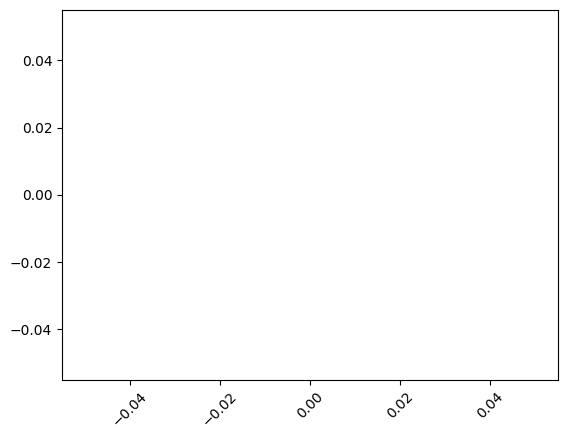

In [12]:
# get a specific route and plot the scatter plot of load over time
route = 'Weekend 1'
data_route = data[data['routeName'] == route]

# get the time values between two times
start_time = pd.Timestamp('2024-10-31 12:00:00')
end_time = pd.Timestamp('2024-11-04 19:30:00')

data_route = data_route[(data_route['timestamp'] > start_time) & (data_route['timestamp'] < end_time)]

# at each distinct timestamp, get the average load
data_route = data_route.groupby('timestamp').mean().reset_index()

# add a hue for each device id
sns.scatterplot(x='timestamp', y='load', data=data_route, palette='tab10')

plt.xticks(rotation=45)
plt.show()

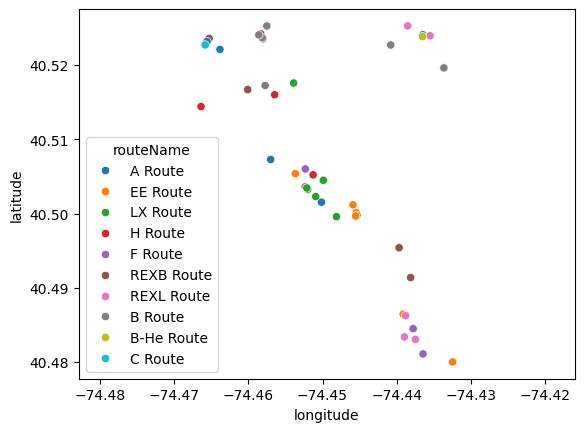

In [13]:
times = data['timestamp'].unique()

time = times[0]

# plot the location of the buses at a specific time
data_time = data[data['timestamp'] == time]

# create a scatter plot with the hue as the route name
sns.scatterplot(x='longitude', y='latitude', hue='routeName', data=data_time)
# make the x and y scale the same
plt.axis('equal')
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_12548\4174053210.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('temp.png'))
C:\Users\akash\AppData\Local\Temp\ipykernel_12548\4174053210.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('temp.png'))
C:\Users\akash\AppData\Local\Temp\ipykernel_12548\4174053210.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio`

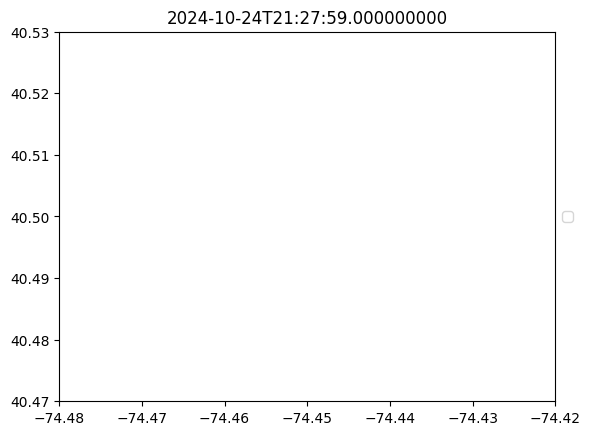

In [9]:
# make a video of the buses over time
import imageio

images = []

bus_id = data['deviceId'].unique()[0]
bus_data = data[data['deviceId'] == bus_id]

try:
    for time in times:
        data_time = bus_data[bus_data['timestamp'] == time]

        plt.figure()
        sns.scatterplot(x='longitude', y='latitude', hue='routeName', data=data_time)
        plt.ylim(40.47, 40.53)
        plt.xlim(-74.48, -74.42)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title(time)
        plt.savefig('temp.png')
        images.append(imageio.imread('temp.png'))
        plt.close()

except KeyboardInterrupt:
    pass

imageio.mimsave('buses.gif', images, duration=0.1)

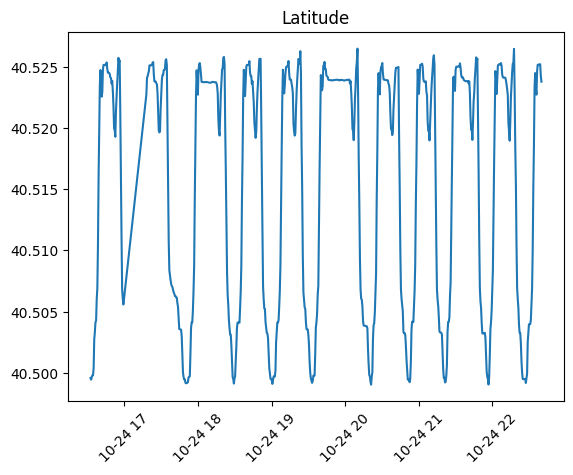

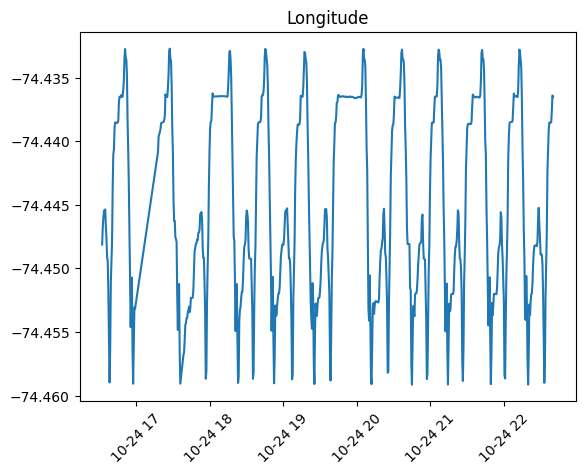

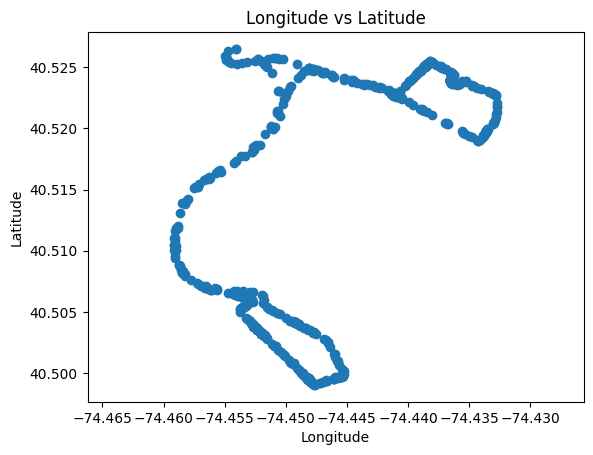

In [14]:
# pick a bus on its route and plot its latitute and longitude for a certain number of observations
bus_id = data['id'].unique()[2]

ROWS = 10000

data_bus = data[data['id'] == bus_id]
data_bus = data_bus.head(ROWS)

# make a line plot for the latitude and longitude
plt.plot(data_bus['timestamp'], data_bus['latitude'])
plt.title('Latitude')
plt.xticks(rotation=45)
plt.show()

plt.plot(data_bus['timestamp'], data_bus['longitude'])
plt.title('Longitude')
plt.xticks(rotation=45)
plt.show()

plt.scatter(data_bus['longitude'], data_bus['latitude'])
plt.title('Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [15]:
# You can then use these points for plotting or other operations
# For example, plot the interpolated points on a map using folium:
m = folium.Map(location=[data_bus['latitude'].mean(), data_bus['longitude'].mean()], zoom_start=13)
# for row in data_bus make a point for it
for index, row in data_bus.iterrows():
    folium.Marker([row['latitude'], row['longitude']], radius=2, color='blue', fill=True, fill_color='blue').add_to(m)

m

In [21]:
data.describe()

id          name  calculatedCourse     longitude  \
count  79712.000000  79712.000000      79712.000000  79712.000000   
mean    9417.224809   3211.250640        179.198192    -74.447872   
std     4621.225395   1606.324416         97.338536      0.010100   
min     4839.000000    127.000000          0.018745    -74.518140   
25%     4877.000000   3260.000000        103.873008    -74.457162   
50%     7181.000000   4038.000000        163.303638    -74.448140   
75%    13214.000000   4190.000000        273.814075    -74.438483   
max    17626.000000   4910.000000        359.970812    -74.186618   

           latitude       paxLoad      totalCap          more       deviceId  \
count  79712.000000  79712.000000  79712.000000  79712.000000   79712.000000   
mean      40.507767     19.590890     66.961875    101.495559  412956.294184   
std        0.015318     21.328391      7.079388      3.564675    9943.352184   
min       40.412717      0.000000     30.000000     11.000000  402213.000000   
25%       40.497621      4.000000     67.000000    101.000000  402720.000000   
50%       40.506680     12.000000     67.000000    102.000000  411189.000000   
75%       40.523497     27.000000     67.000000    102.000000  422698.000000   
max       40.739773     80.000000     80.000000    105.000000  429484.000000   

        routeBlockId          load  
count   79712.000000  79712.000000  
mean   109477.977381      0.289753  
std     16420.335250      0.303032  
min      5451.000000      0.000000  
25%    111533.000000      0.059701  
50%    111644.000000      0.179104  
75%    112517.000000      0.402985  
max    117898.000000      1.000000

In [28]:
bus_id = 4855
data_bus = data[data['id'] == bus_id]
data_bus = data_bus.sort_values('timestamp')
data_bus.head()

id  name         type  calculatedCourse routeName   created  longitude  \
0    4855  4131  Transit Bus        135.131827   A Route  04:32 PM -74.450146   
48   4855  4131  Transit Bus        133.766005   A Route  04:32 PM -74.448791   
96   4855  4131  Transit Bus        136.339422   A Route  04:33 PM -74.448129   
144  4855  4131  Transit Bus         82.525166   A Route  04:33 PM -74.448071   
192  4855  4131  Transit Bus        133.584599   A Route  04:34 PM -74.447733   

      latitude  paxLoad  totalCap  more  deviceId  routeBlockId  \
0    40.501523        0        67   102    402213        111533   
48   40.500219        0        67   102    402213        111533   
96   40.499526        0        67   101    402213        111533   
144  40.499533        3        67   101    402213        111533   
192  40.499235        3        67   101    402213        111533   

              timestamp      load  
0   2024-10-24 16:32:24  0.000000  
48  2024-10-24 16:32:55  0.000000  
96  2024-10-24 16:33:25  0.000000  
144 2024-10-24 16:33:55  0.044776  
192 2024-10-24 16:34:25  0.044776

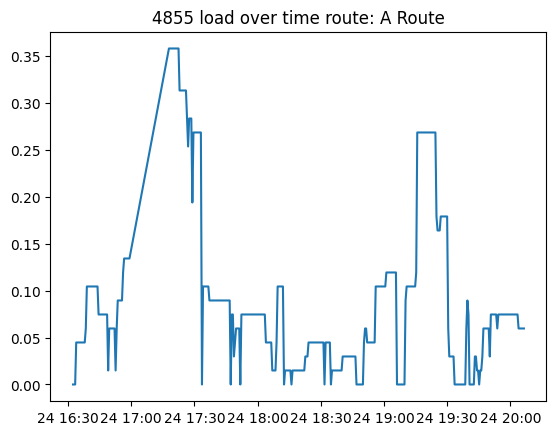

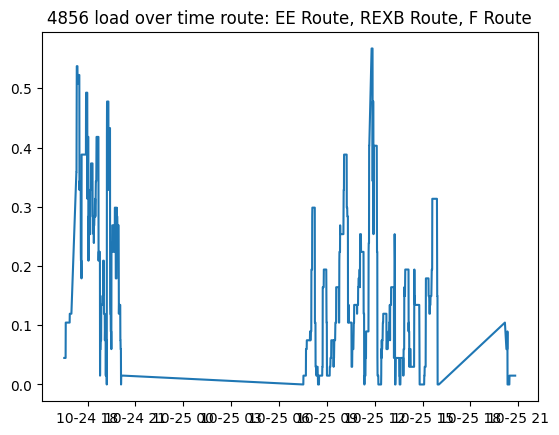

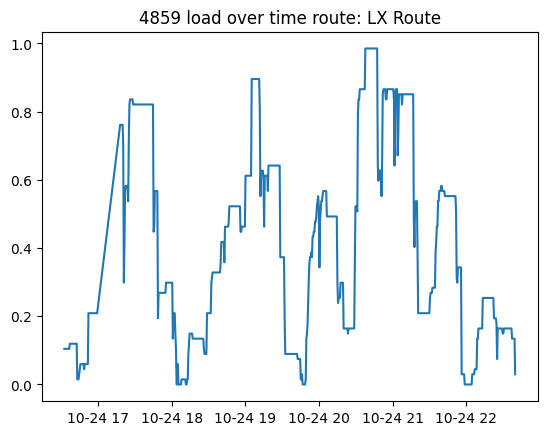

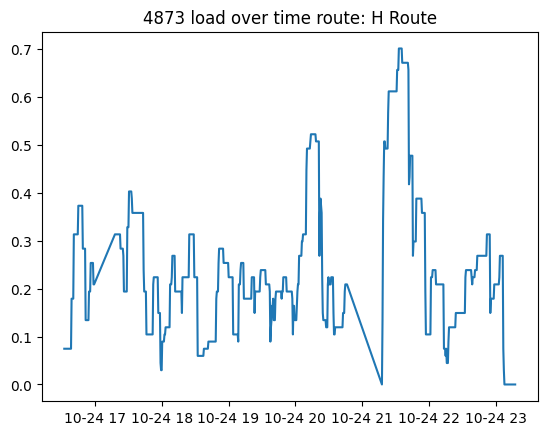

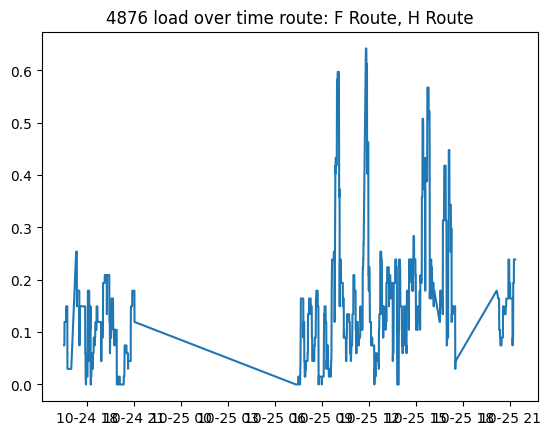

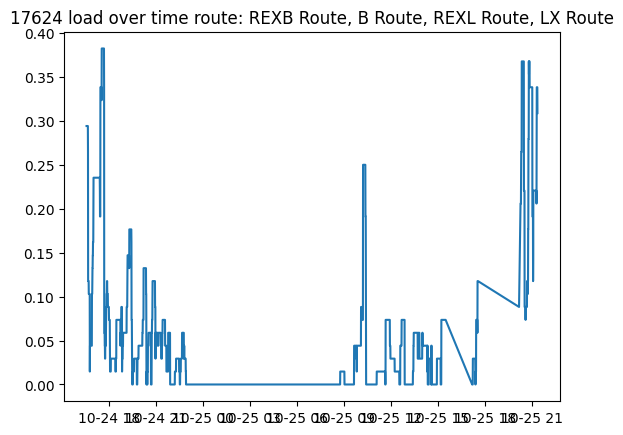

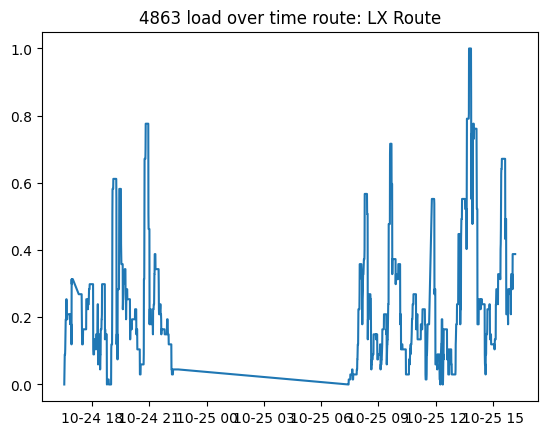

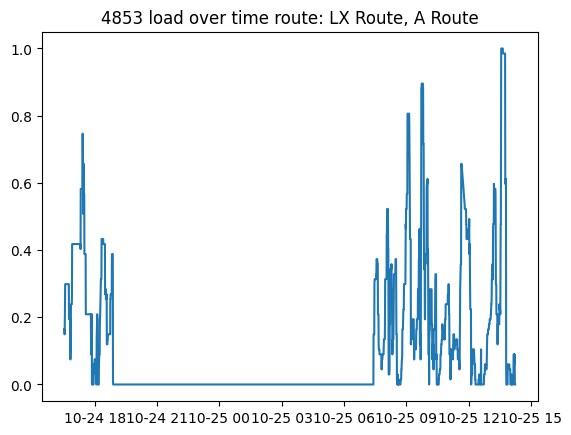

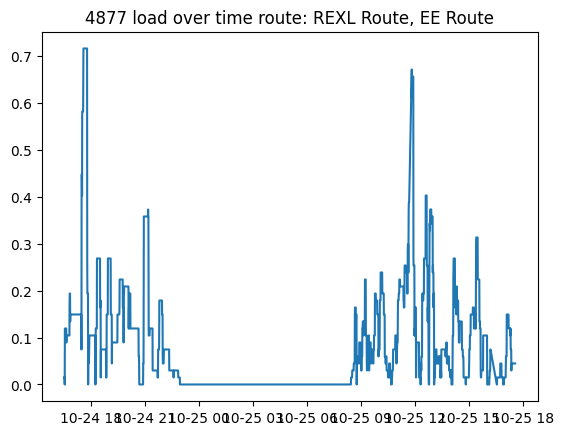

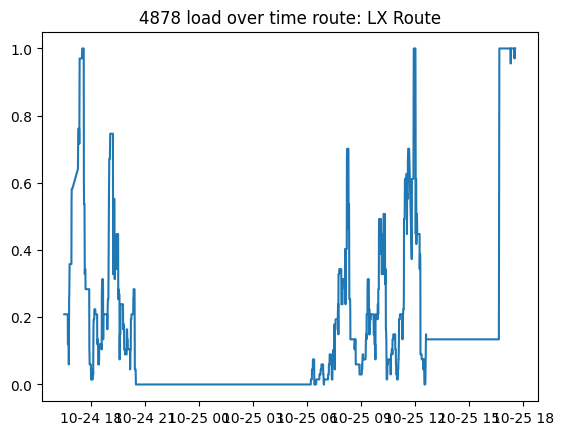

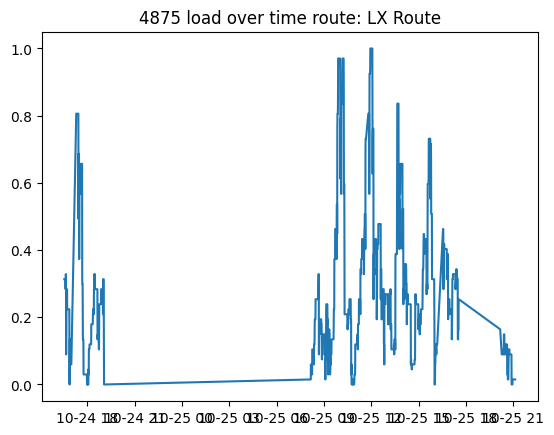

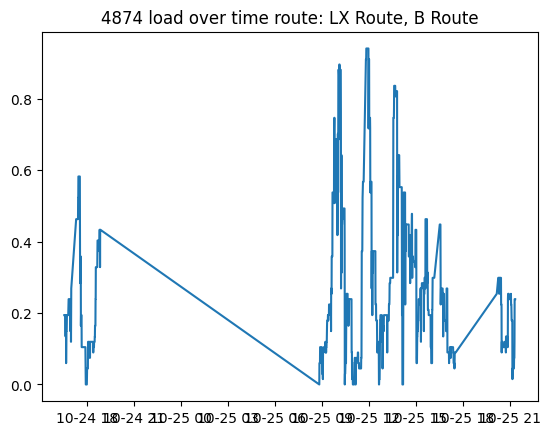

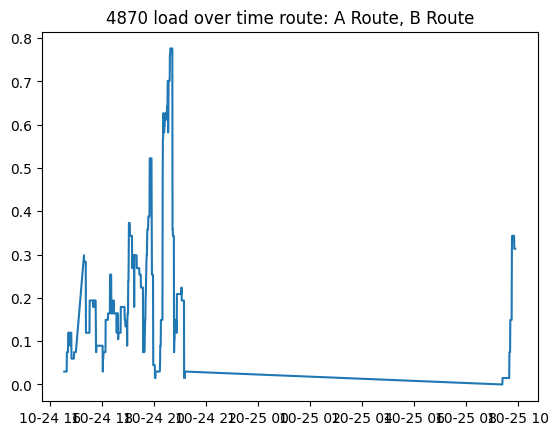

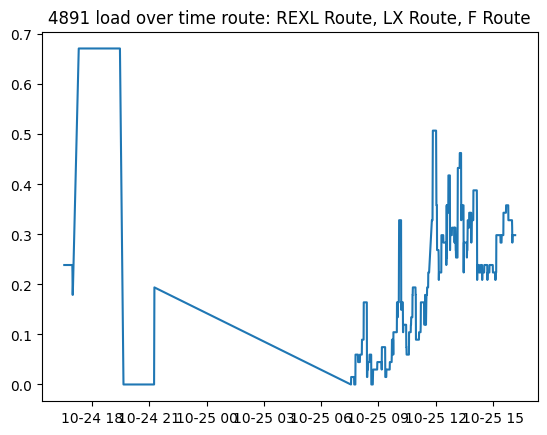

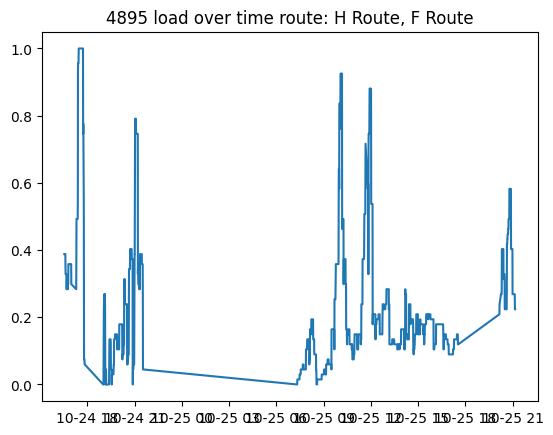

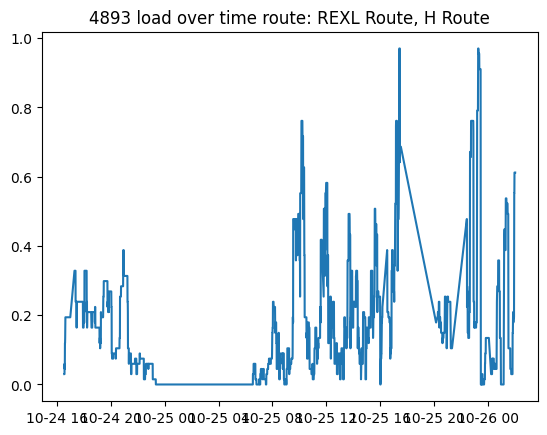

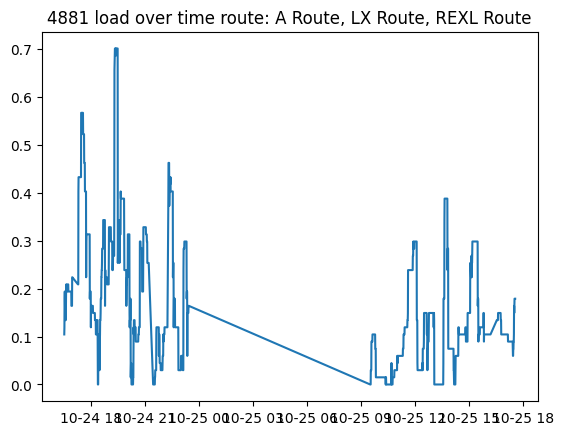

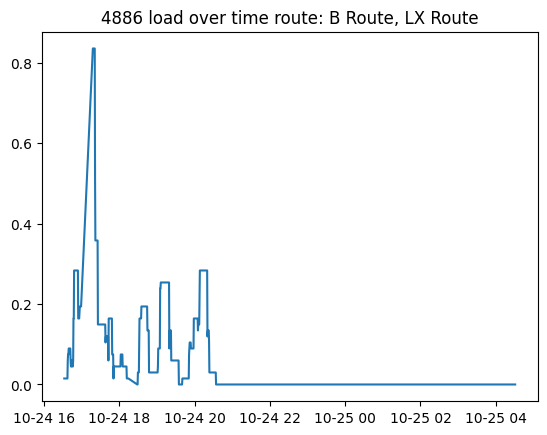

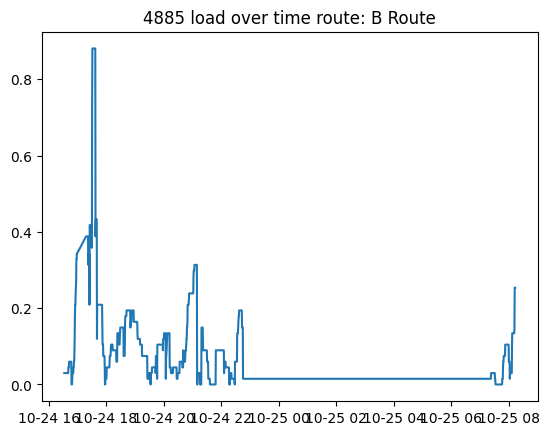

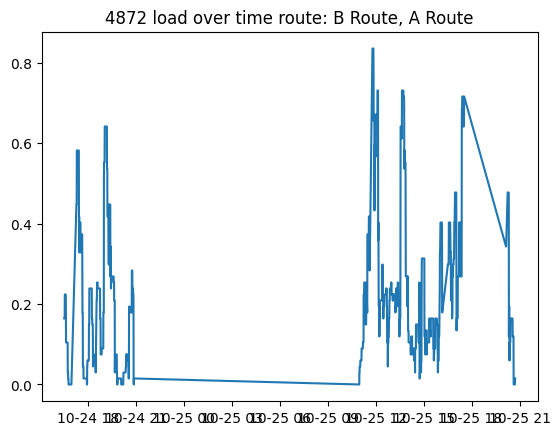

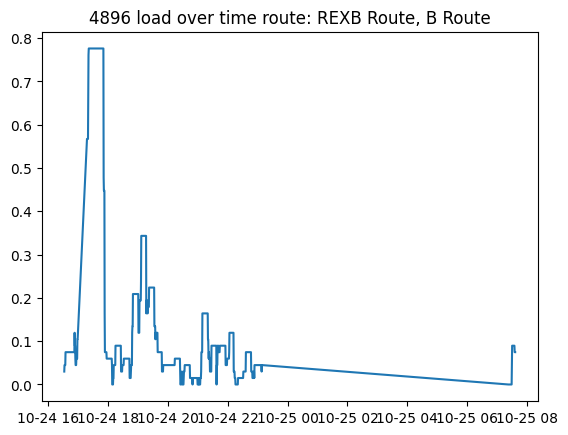

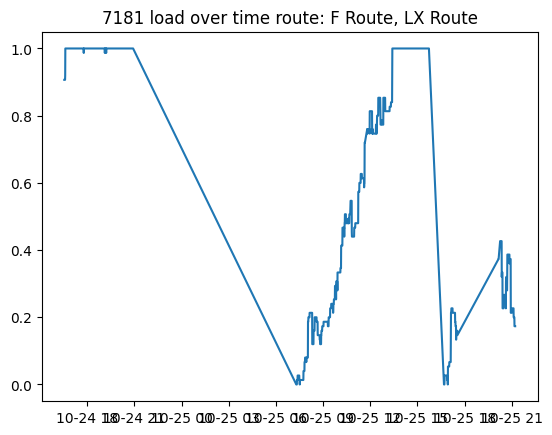

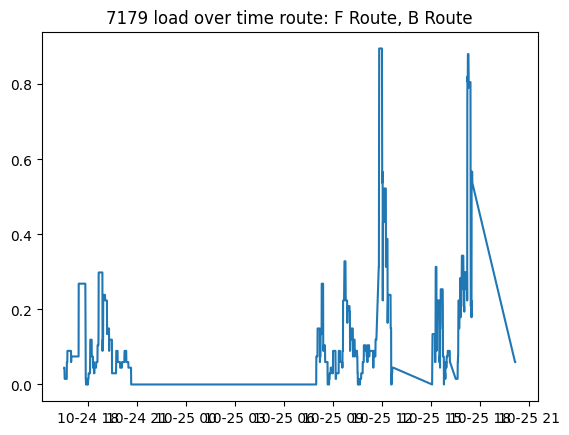

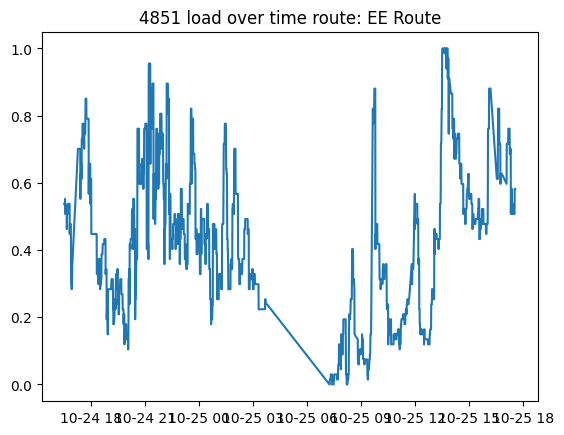

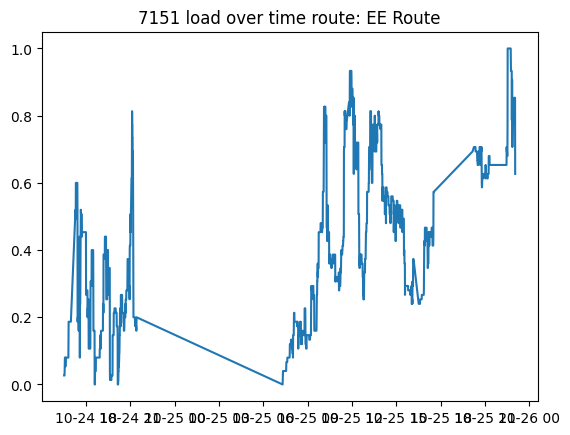

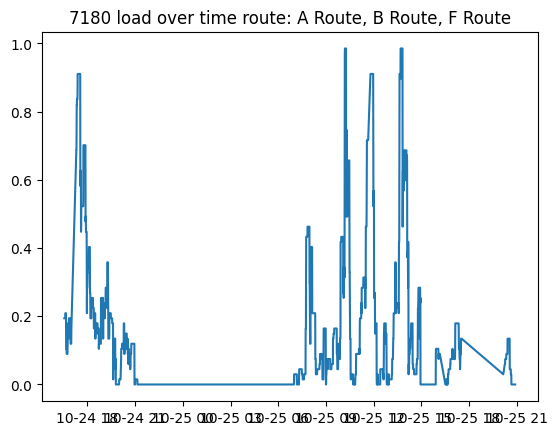

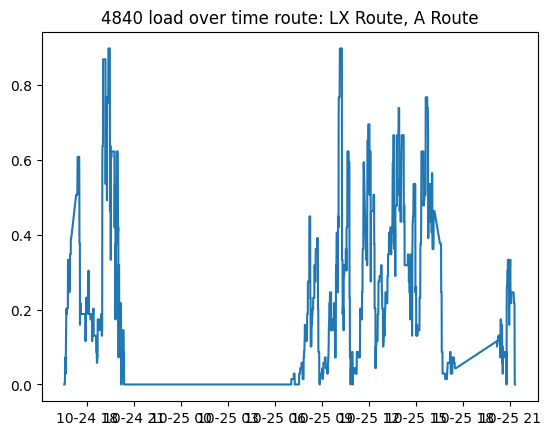

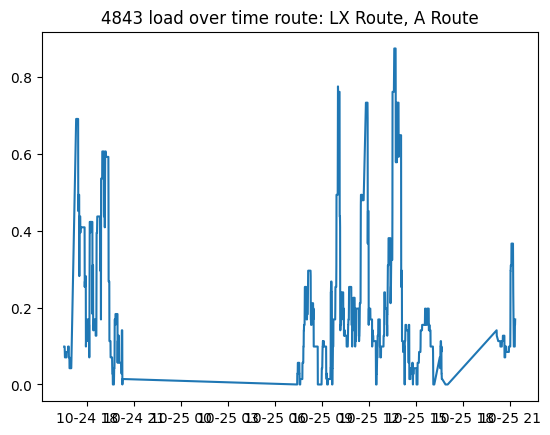

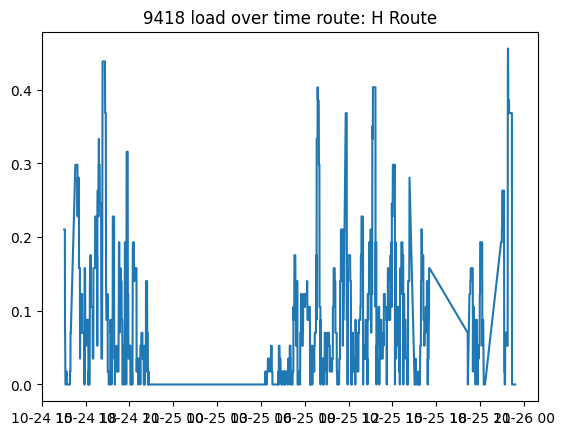

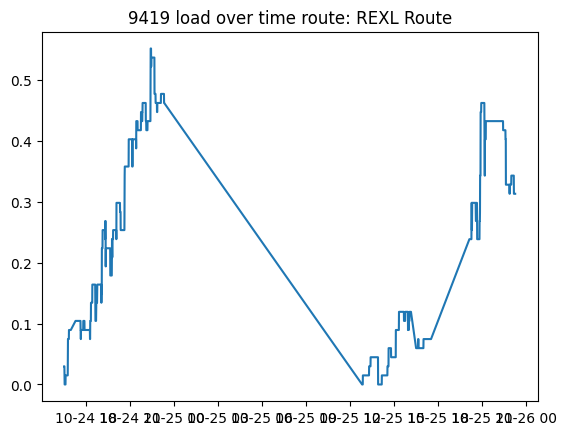

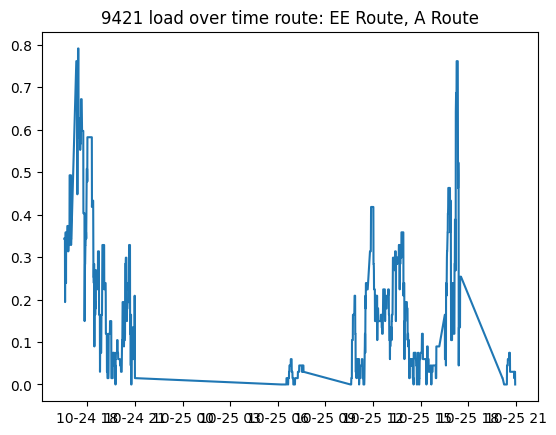

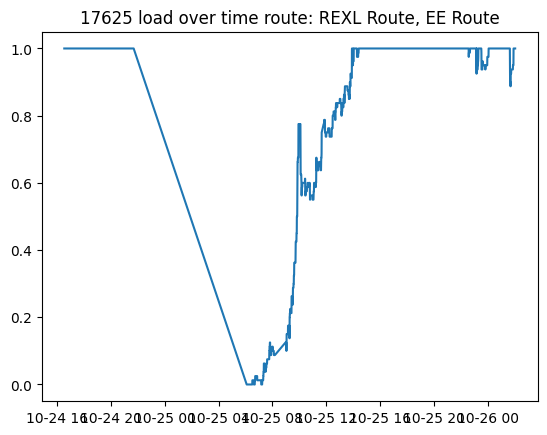

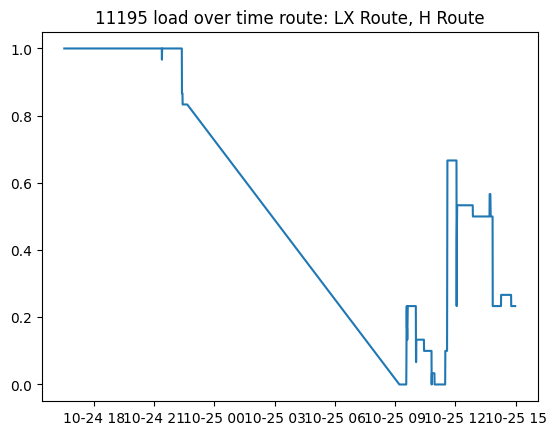

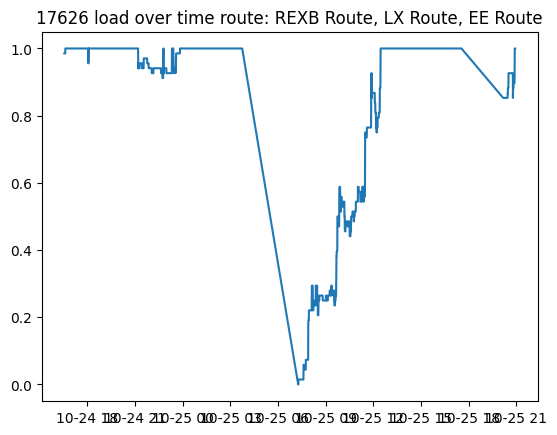

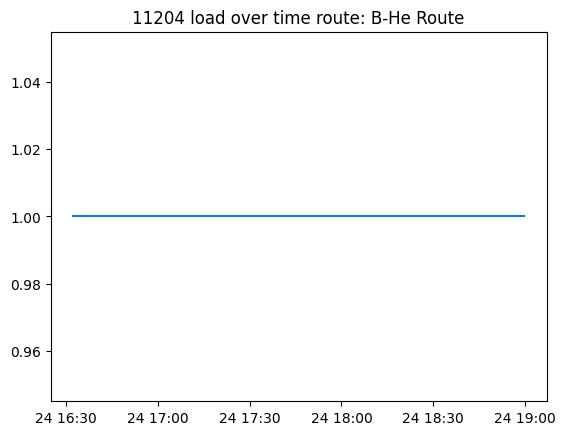

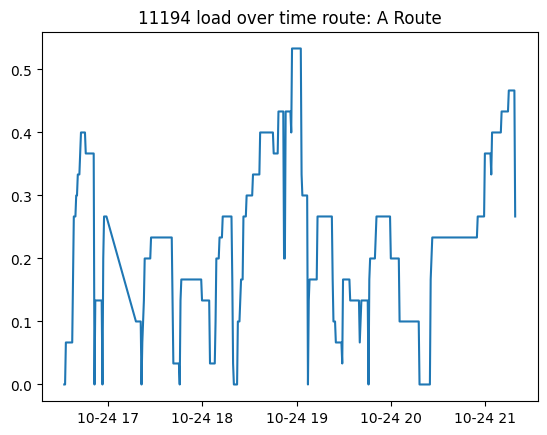

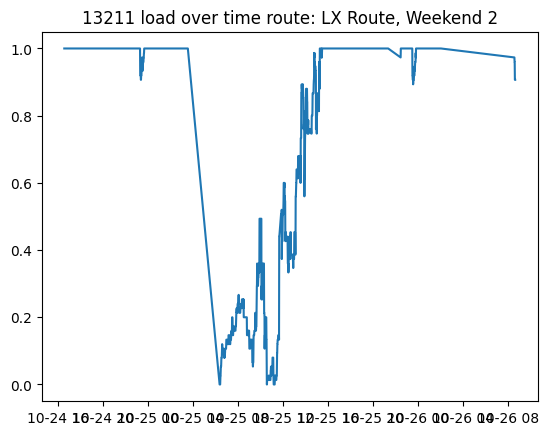

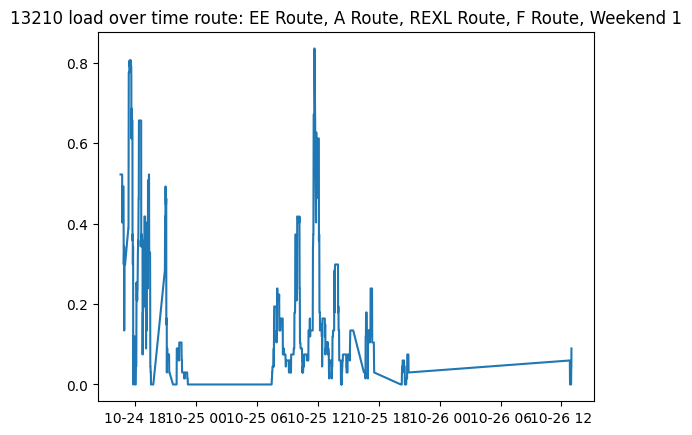

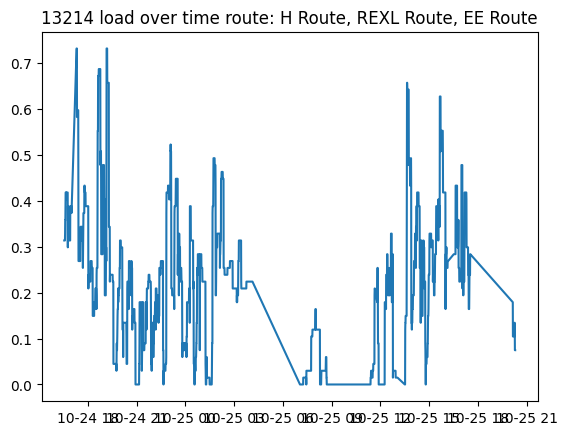

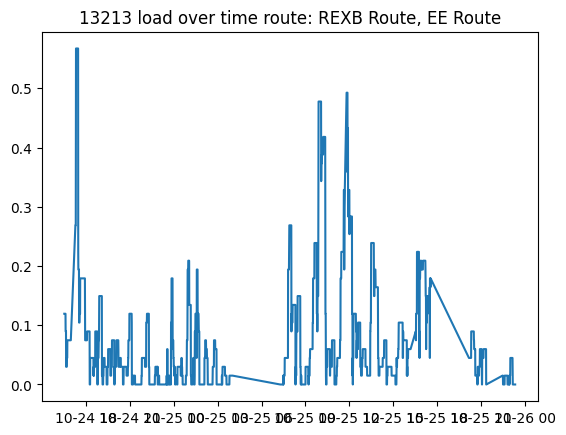

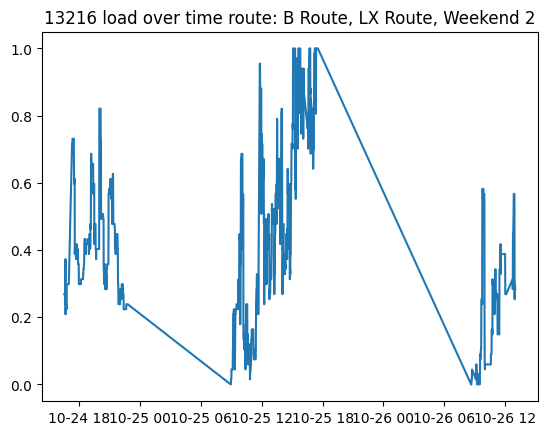

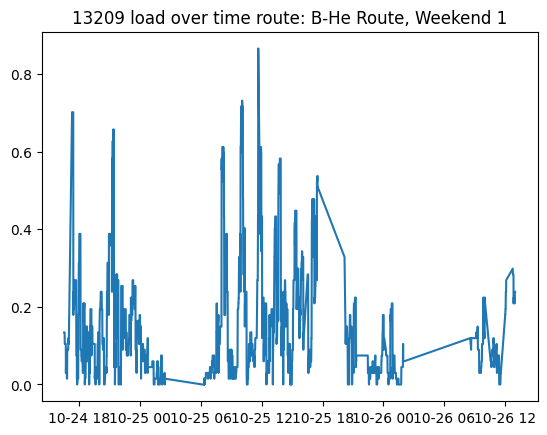

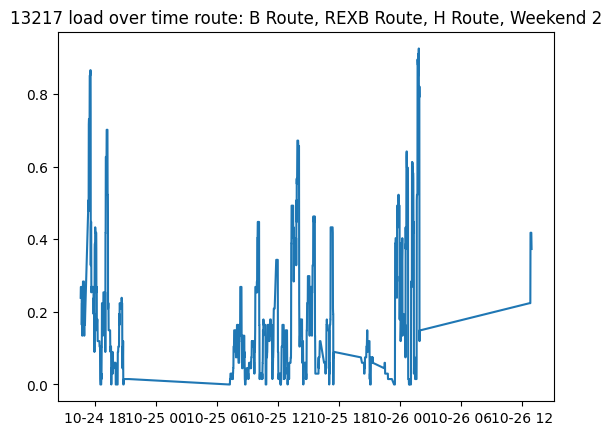

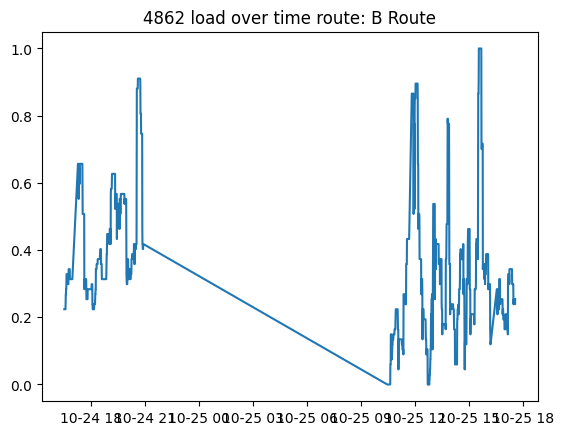

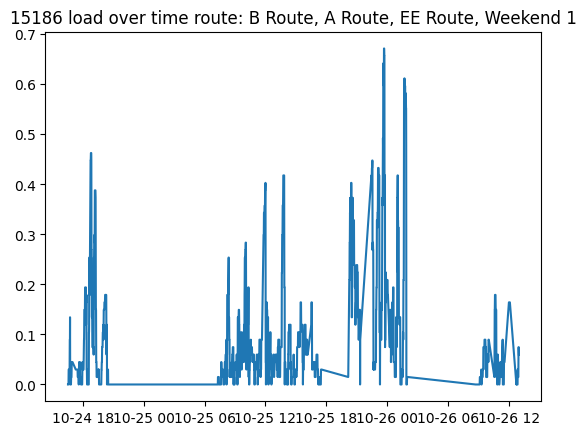

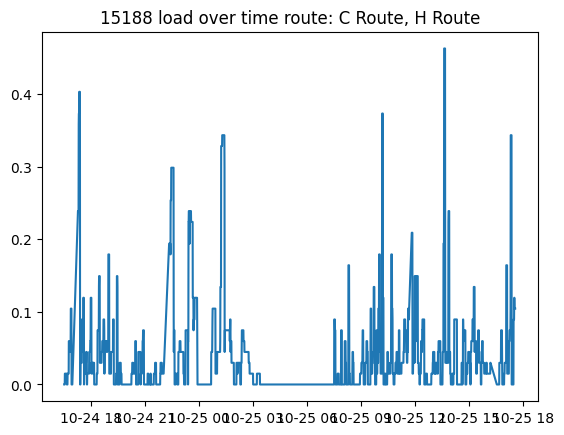

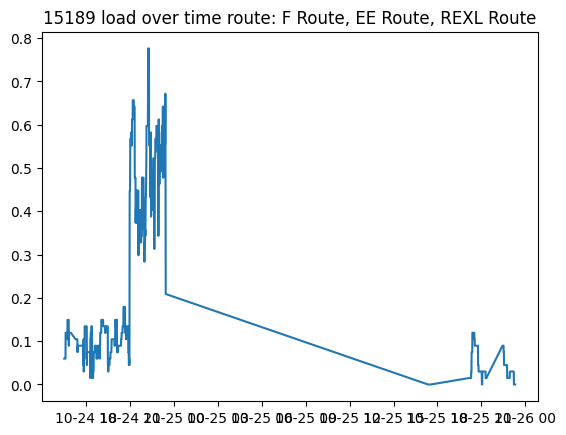

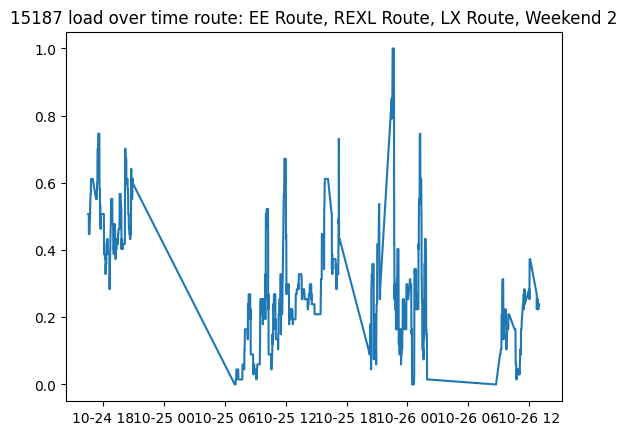

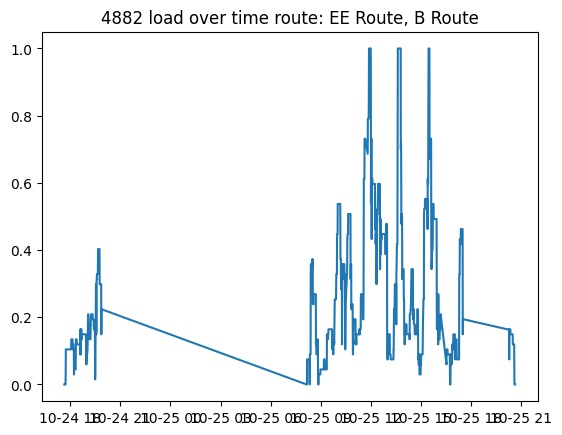

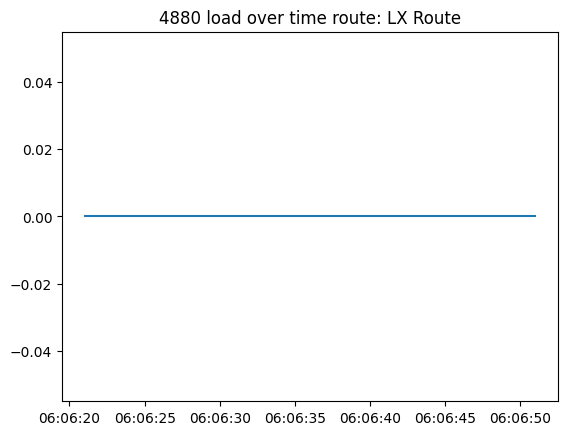

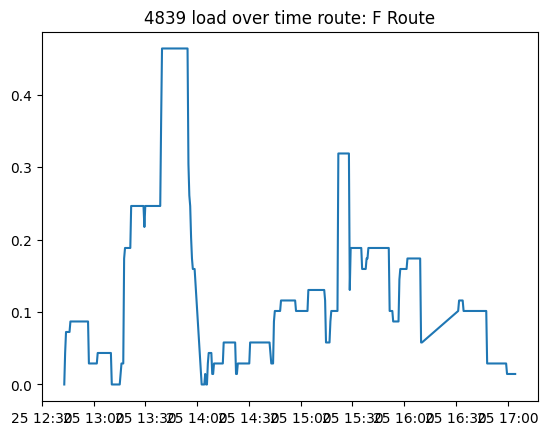

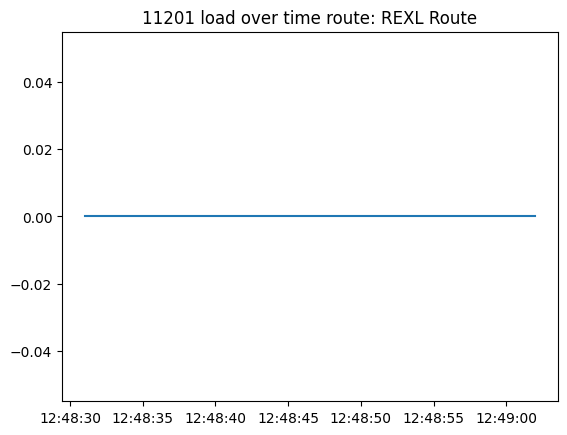

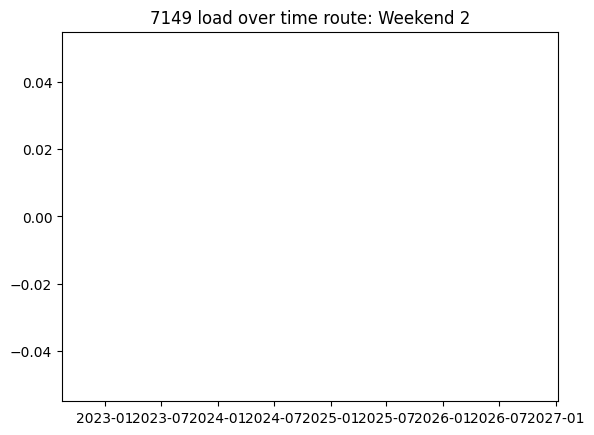

In [8]:
for bus in data['id'].unique():
    data_bus = data[data['id'] == bus]
    plt.plot(data_bus['timestamp'], data_bus['load'], label=bus)
    plt.title(str(bus) + ' load over time' + ' route: ' + ', '.join(list(data_bus['routeName'].unique())))
    plt.show()

In [9]:
bus_id = data['id'].unique()[2]

ROWS = 10000

data_bus = data[data['id'] == bus_id]
data_bus = data_bus.head(ROWS)

# You can then use these points for plotting or other operations
# For example, plot the interpolated points on a map using folium:
m = folium.Map(location=[data_bus['latitude'].mean(), data_bus['longitude'].mean()], zoom_start=13)
# for row in data_bus make a point for it
for index, row in data_bus.iterrows():
    folium.Marker([row['latitude'], row['longitude']], radius=2, color='blue', fill=True, fill_color='blue').add_to(m)

m

C:\Users\akash\AppData\Local\Temp\ipykernel_22952\2195981233.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['cluster'] = kmeans.labels_


          latitude  longitude
cluster                      
0        40.505377 -74.451515
1        40.518036 -74.461242
2        40.523602 -74.458078
3        40.499577 -74.448245
4        40.524993 -74.463479
...            ...        ...
95       40.516733 -74.458356
96       40.523301 -74.457794
97       40.517332 -74.453071
98       40.499209 -74.447839
99       40.522024 -74.463511

[100 rows x 2 columns]


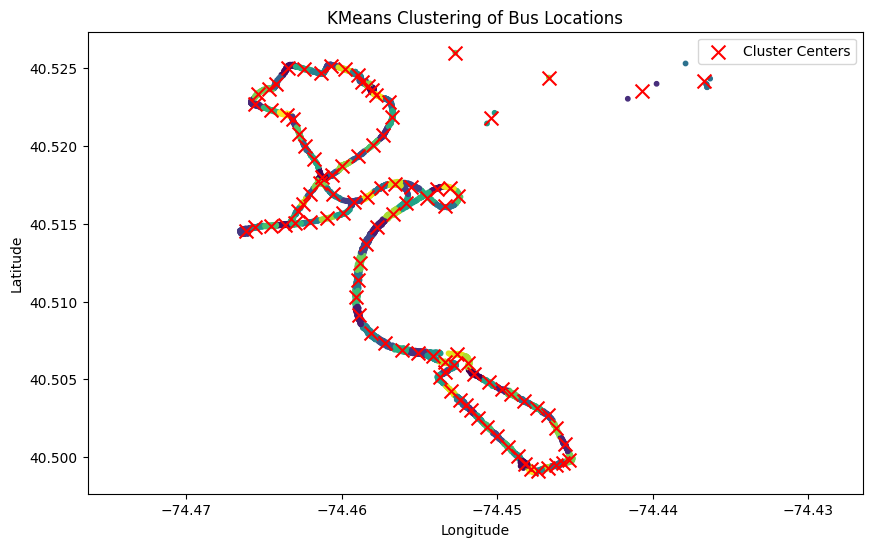

In [18]:
# prompt: make 30 clusters and show average position for points

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data_bus' DataFrame from the previous code is available
# get A Route data
data_bus = data[data['routeName'] == 'A Route']

# Prepare data for clustering
X = data_bus[['latitude', 'longitude']]

# Perform KMeans clustering with 30 clusters
kmeans = KMeans(n_clusters=100, random_state=0).fit(X)

# Get cluster labels for each data point
data_bus['cluster'] = kmeans.labels_

# Calculate the average position for each cluster
average_positions = data_bus.groupby('cluster').agg({'latitude': 'mean', 'longitude': 'mean'})

# Print the average positions
print(average_positions)

# Visualize clusters and average positions
plt.figure(figsize=(10, 6))
plt.scatter(data_bus['longitude'], data_bus['latitude'], c=data_bus['cluster'], cmap='viridis', s=10)
plt.scatter(average_positions['longitude'], average_positions['latitude'], marker='x', s=100, c='red', label='Cluster Centers')
plt.title('KMeans Clustering of Bus Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.legend()
plt.show()